## The Purpose of this Notebook is to Automate the NaN Elimination During Data Clean-up

Many data sets are littered with NaN (not available data points). These points need to be removed along with the feature or the sample in order to do linear algebra operations on the matrix(X). This process can be a slow process of droping columns with many NaNs or samples with many NaNs. 

After processing the dataframe so that the rows and columns have been consolidated with more NaN rich rows and columns on the extreme bottom and right side of the dataframe, the idexes of the uppermost NaN is found for each column. This information is used to search for the largest NaN-free window efficiently. 

That largest NaN-free window will be the data frame for linear regression. 

In [1]:
import pandas
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn

#!ls ./pickles/*
iter_4r = pandas.read_pickle("./pickles/iter_4r.pkl")

In [2]:
iter_4r.tail() #note many NaN at bottom of array

,CNT,YR,POP_TOT,POP_GRO%,AREA,URB_GRO%,FORR_AREA,MORT_RATE,POP_DEN,GDP,...,MILIT%GDP,SCH_ENR_PR&SEC,ENRG_PERCAP,HIGH_TECH_EXP%,ELEM_GRAD,OFF_DEV_ASS_NET,HIV,ELEC_PERCAP,HOSP_BIRTH,TAX_REV%GDP
813,SLB,2017.0,0.61,2.0,28.9,4.0,21.9,21.0,21.8,1.30,...,NaN,NaN,NaN,1.0,NaN,181.5,NaN,NaN,86.0,26.7
814,DMA,2017.0,0.07,0.5,0.8,0.9,0.4,34.0,98.6,0.56,...,NaN,1.0,NaN,NaN,118.0,8.5,NaN,NaN,96.0,22.1
815,MMR,1990.0,40.63,1.5,676.6,2.2,392.2,116.0,62.2,NaN,...,3.4,1.0,263.0,0.0,NaN,160.8,0.1,45.0,46.0,6.2
816,PNG,2017.0,8.25,2.0,462.8,2.4,335.6,53.0,18.2,21.09,...,0.5,NaN,NaN,NaN,NaN,527.9,0.9,NaN,NaN,13.5
817,LCA,2017.0,0.18,0.5,0.6,0.8,0.2,17.0,293.2,1.71,...,NaN,NaN,NaN,6.0,NaN,15.2,NaN,NaN,NaN,20.4


In [81]:
import time
def _log_image_df(fig, df, timestr):
    log_df(df, timestr)
    log_image(fig,timestr)

def _log_image(fig, timestr):    
    image_name="./images/" + timestr + "_clarify.png"
    fig.savefig(image_name)
    print(f'saved img: {image_name}')

def _log_df(df, timestr):
    pickle_name = "./pickles/" + timestr + "_clarify.pkl"    
    df.to_pickle(pickle_name)
    print(f'saved pickle: {pickle_name}')


def nan_heatmap(df, title='No Title Provided (title=)', log=False):
    """
    nan_heatmap displays a heatmap version of the dataframe, where NaN cells are purple.
    Two additiona keyword arguements are title (which will be added to the image). Additionally,
    if log is set to True:
    1. the heatmap is saved with a timestamp.
    2. the data frame is pickled with the same timestamp.
    3. the paths are printed for convenience
    """
    mask1 = df.isnull()
    fig, ax1 = plt.subplots(1,1, figsize=(8,20), sharey=False)
    fig.suptitle('NaN Heatmap', fontsize=32)
    ax1.set_title(title, fontsize=28)
    sbn.heatmap(mask1.iloc[:,:], vmin=0, vmax=10**-8, ax=ax1, cmap='Purples', cbar=False)
    for _, spine in ax1.spines.items():
        spine.set_visible(True)
    if log :
        timestr = time.strftime("%Y%m%d_%H%M%S")
        _log_image_df(fig, df, timestr)
    plt.show()

#iter_4r = iter_4.reset_index(drop=True)    
#nan_heatmap(iter_4r, 'iter_4r', log=False)    

saved pickle: ./pickles/20181007_181732_clarify.pkl
saved img: ./images/20181007_181732_clarify.png


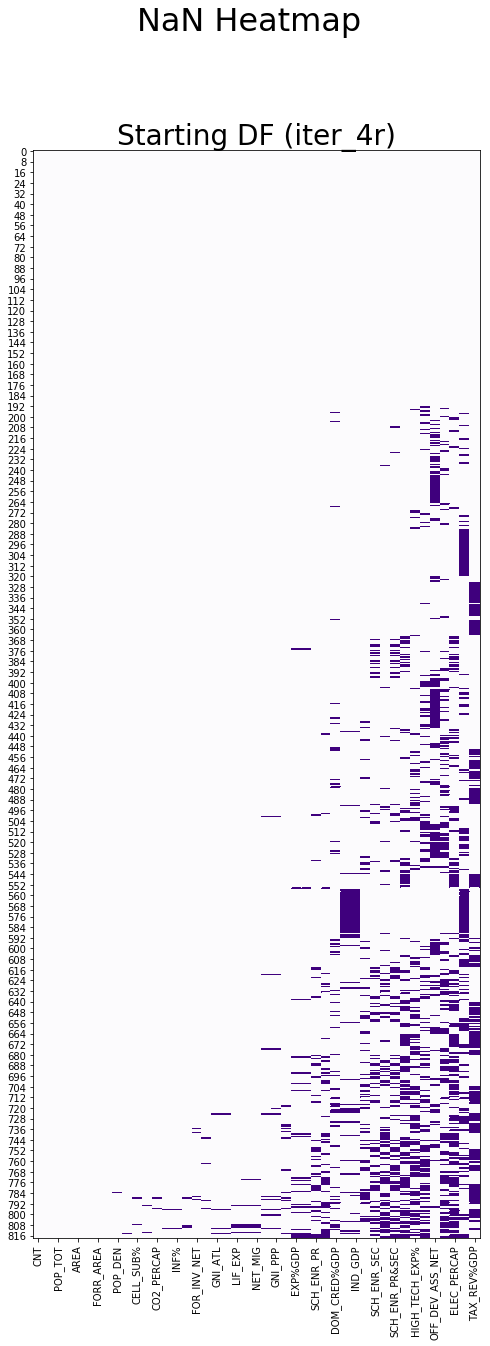

In [80]:
nan_heatmap(iter_4r, title='Starting DF (iter_4r)', log=True)


In [82]:
def tips_index(df):
    """
    A 'tip' is the NaN with the lowest index value in a column (Rmin,C) (looks like the tip of a mountain when viewed by 
    heatmap). All NaN cell indices are identified. The (Rmin, C) are returned for each column. These tips are ideal sites to 
    check for the largest possible matrix with NaNs.
    
    tips_index(df) ==> [(784, 8), (815, 9), (788, 10)...]
    """
    #index values for NaN cells
    r,c = np.where(df.isna())
    #zip into (r,c) tuple pairs
    nan_tuples = list(zip(r.tolist(), c.tolist()))
    #make list of colums with tuples
    column_vals = set(map(lambda x : x[1], nan_tuples))
    #group tuples by column
    col_bin_nan = [[t for t in nan_tuples if t[1] == c] for c in column_vals]
    #print(col_bin_nan)
    #for each column the tip tuple is the first
    tips = [x[0] for x in col_bin_nan]
    return tips


In [85]:
tip_list = tips_index(iter_4r)
#print(tip_list)
for t in tip_list:
    print(t)
    #need to add one to include the NaN cell (slices exclude max value), some are already true because they have
    #an internal NaN, suggesting the r,c points to an NaN in a valley, adjacent tips may be inside the window.
    print(iter_4r.iloc[:t[0], :t[1]].isnull().any().any() )

(784, 8)
False
(815, 9)
True
(788, 10)
True
(794, 11)
True
(788, 12)
True
(797, 13)
True
(797, 14)
True
(788, 15)
True
(736, 16)
False
(743, 17)
True
(725, 18)
False
(725, 19)
False
(794, 20)
True
(774, 21)
True
(774, 22)
True
(501, 23)
False
(501, 24)
False
(719, 25)
True
(375, 26)
False
(375, 27)
False
(500, 28)
True
(439, 29)
True
(197, 30)
False
(437, 31)
True
(437, 32)
True
(430, 33)
True
(368, 34)
True
(237, 35)
True
(208, 36)
True
(366, 37)
True
(195, 38)
False
(193, 39)
False
(203, 40)
True
(194, 41)
True
(201, 42)
True
(198, 43)
True
(325, 44)
True


In [86]:
def _search_horizontally(r,c, df):
    """
    helper function to return the best horizontal window without NaN from starting r,c in df. The window from 
    df.iloc[0:r, 0:c] is clear of NaN, but df.iloc[0:r+1, 0:c+1] is an NaN. Therefore, searching horizontally
    (and vertically) from the current poition could result in a larger NaN-free window.
    """
    if df.iloc[0:r, 0:c].isnull().any().any():
    #if area already has tuples inside, we can quit this point.
        return((0,0,0))
    while not df.iloc[0:r, 0:c].isnull().any().any():
        if c > len(df.columns):
            break
        c+=1
    c-=1
    return((r,c,r*c))

def _search_vertically(r,c, df):
    """
    helper function to return the best vertical window without NaN from starting r,c in df. The window from 
    df.iloc[0:r, 0:c] is clear of NaN, but df.iloc[0:r+1, 0:c+1] is an NaN. Therefore, searching vertically
    (and horizontally) from the current poition could result in a larger NaN-free window.
    """
    if df.iloc[0:r, 0:c].isnull().any().any():
    #if area already has tuples inside, we can quit this point.
        return((0,0,0))
    while not df.iloc[0:r, 0:c].isnull().any().any():
        if r > len(df):
            break
        r+=1
    r-=1
    return((r,c,r*c))


def _pick_hv_nonan(tuple_ind, df):
    """
    helper funciton to search horizontally and vertically from a given NaN index (r,c) in df.
    It will return a (r,c,r*c) tuple with where r*c is best available of the horizonatl and vertical searches.
    """
    #step back from NaN index and begin two searches.
    r,c = tuple_ind
    #r_=r-1
    #c_=c-1
    if df.iloc[0:r, 0:c].isnull().any().any():
        #if area already has tuples inside, we can quit this point.
        return(0,0,0)
    best_horz = _search_horizontally(r,c, df)
    best_vert = _search_vertically(r,c, df)
    #print(best_horz, best_vert)
    if best_horz[2] > best_vert[2] :
        return best_horz
    else :
        return best_vert
    
def best_nonan(df):
    """
    Finds the largets no-NaN window in df and returns (r,c,r*c) for that window
    r,c,a=best_nonan(df)
    has_nan(r,c) #<== should return False (no NaN), and a is largest possible in df. 
    """
    collection = []
    tips = tips_index(df)
    for tip in tip_list :
        #print(f'at site {tip}')
        collection.append(_pick_hv_nonan(tip,iter_4r))
        sort_list = sorted(list(set(collection)), key=lambda x: x[2], reverse=True)                  
    return sort_list[0]

def has_nan(r,c,df):
    """
    True if df.iloc[:r, :c] window contains a NaN, False otherwise. All best_nonan() results should should return False. 
    But adding 1 to either the input r or c should result in True for one or both new windows. 
    """
    return df.iloc[:r, :c].isnull().any().any()
    


In [102]:
df=iter_4r
best = best_nonan(df)   #<=====This number is the one we want.
r,c,a=best
print(best)        
print(has_nan(r,c,df))   
print(has_nan(r,c+1,df))
print(has_nan(r+1,c,df))
clean_data=df.iloc[:r, :c]

(725, 23, 16675)
False
True
True


In [105]:
clean_data[clean_data.CNT == 'CHN']

,CNT,YR,POP_TOT,POP_GRO%,AREA,URB_GRO%,FORR_AREA,MORT_RATE,POP_DEN,GDP,...,GDP_GROW%,INF%,INTERNET%,FOR_INV_NET,IMM_MEAS,GNI_ATL,GPC_ATL,LIF_EXP,TEEN_FER_RATE,NET_MIG
194,CHN,2010.0,1337.71,0.5,9562.9,3.3,2006.1,16.0,142.5,6100.62,...,10.6,6.9,34.3,243703.0,99.0,5810.91,4340.0,75.0,7.0,-1698.0
482,CHN,1990.0,1135.19,1.5,9563.0,4.3,1571.4,54.0,120.9,360.86,...,3.9,5.7,0.0,3487.0,98.0,374.11,330.0,69.0,19.0,-764.0
483,CHN,2000.0,1262.65,0.8,9562.9,3.6,1770.0,37.0,134.5,1211.35,...,8.5,2.1,1.8,42095.0,84.0,1181.55,940.0,72.0,9.0,-2030.0
506,CHN,2017.0,1386.40,0.6,9562.9,2.7,2083.2,9.0,147.7,12237.70,...,6.9,4.1,54.3,168224.0,99.0,12042.91,8690.0,76.0,7.0,-1625.0


saved pickle: ./pickles/20181007_183404_clarify.pkl
saved img: ./images/20181007_183404_clarify.png


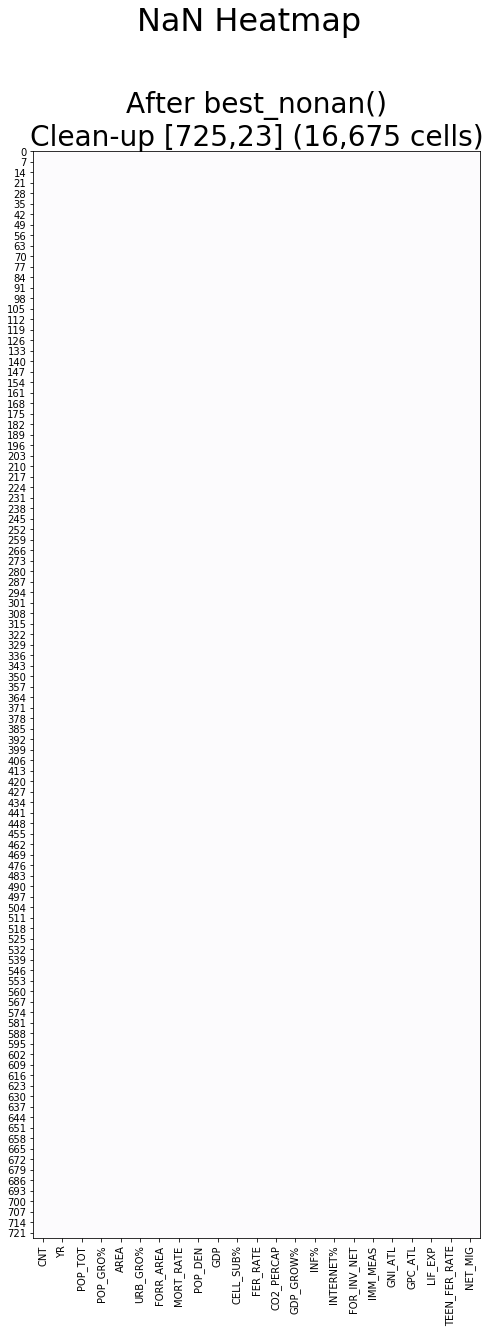

In [106]:
nan_heatmap(clean_data, title="After best_nonan()\nClean-up [725,23] (16,675 cells)", log=True)